In [1]:
# Main imports
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
%matplotlib inline

from detector import Detector

Using TensorFlow backend.


In [2]:
depth = 5
margin = 100
fillerWidth = 320
windowSplit = 2
winCount = 18
searchPortion = 1.

pipAlpha = .7
pipScaleRatio = .35

pipParams = {'alpha': pipAlpha, 'scaleRatio': pipScaleRatio}

ld = Detector(imgMarginWidth=fillerWidth, historyDepth=depth,
              margin=margin, windowSplit=windowSplit, winCount=winCount,
              searchPortion=searchPortion, veHiDepth=45,
              pointSize=64, groupThrd=10, groupDiff=.1, confidenceThrd=.5)

In [3]:
test_imgs_dir = "test_images"

In [4]:
test_imgs_paths = glob.glob(test_imgs_dir + "/*.jpg")

In [5]:
test_img_names = np.asarray(list(map(lambda img_path: img_path.split("/")[-1].split(".")[0], test_imgs_paths)))
result_test_img_names = np.asarray(list(map(lambda img_name: "{0}{1}".format("result_", img_name), test_img_names)))

In [6]:
def load_image(path, to_rgb=True):
    """
    Load image from the given path. By default the returned image is in RGB.
    When to_rgb is set to False the image return is in BGR. 
    """
    img = cv2.imread(path)
    return img if not to_rgb else cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [7]:
test_imgs = np.asarray(list(map(lambda img_path: load_image(img_path), test_imgs_paths)))

In [8]:
result_test_imgs = np.asarray(list(map(lambda img: ld.embedDetections(src=img, pipParams=pipParams), test_imgs)))

In [9]:
test_img_and_result = np.asarray(list(zip(test_imgs, result_test_imgs)))
test_img_and_result_names = np.asarray(list(zip(test_img_names, result_test_img_names)))

In [11]:
def show_image_list(img_list, img_labels, title, cols=2, fig_size=(15, 15), show_ticks=True):
    """
    Utility function to to show a list of images
    """
    rows = len(img_list)
    cmap = None

    fig, axes = plt.subplots(rows, cols, figsize=fig_size)

    for i in range(0, rows):
        for j in range(0, cols):
            ax = axes[i, j] if rows > 1 else axes[j]
            #k = i * cols + j
            img_name = img_labels[i][j]
            img = img_list[i][j]
            if len(img.shape) < 3 or img.shape[-1] < 3:
                cmap = "gray"
                img = np.reshape(img, (img.shape[0], img.shape[1]))

            if not show_ticks:
                ax.axis("off")

            ax.imshow(img, cmap=cmap)
            ax.set_title(img_name)

    fig.suptitle(title, fontsize=12, fontweight='bold', y=1)
    fig.tight_layout()
    plt.show()

    return

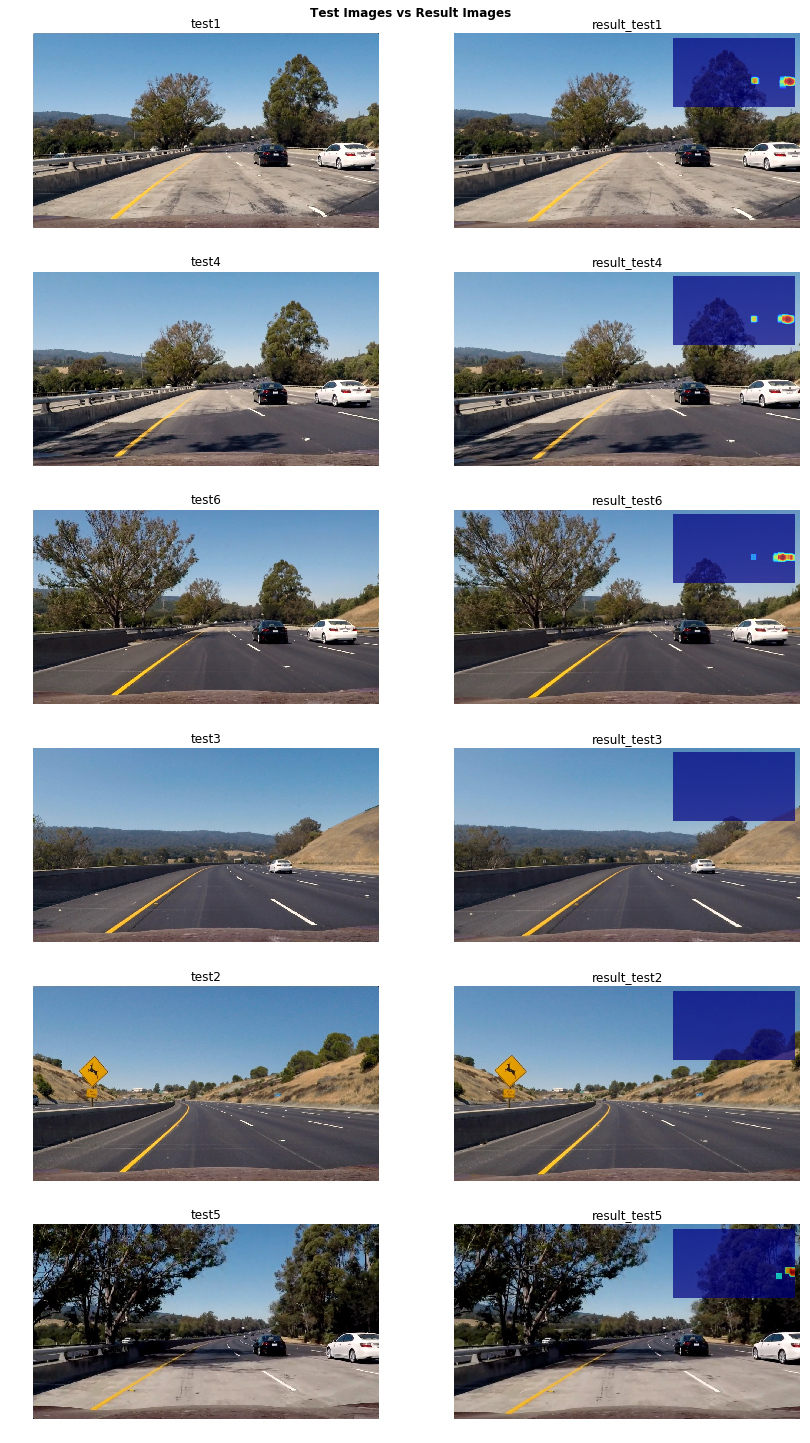

In [13]:
show_image_list(test_img_and_result, test_img_and_result_names, "Test Images vs Result Images", fig_size=(12, 20), cols=2, show_ticks=False)